# Sales order data exploration
Use this notebook to explore sales order data

In [1]:
df = spark.read.format("csv").option("header","true").load("Files/orders/2019.csv")
# df now is a Spark DataFrame containing CSV data from "Files/orders/2019.csv".
display(df)

StatementMeta(, 7d89f107-a037-470f-8456-afb70515830b, 3, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 6c795cab-b756-4651-be0e-18f1bbf678ff)

In [2]:
df = spark.read.format("csv").option("header","false").load("Files/orders/2019.csv")

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 4, Finished, Available, Finished)

In [3]:
from pyspark.sql.types import *

orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/2019.csv")

display(df)

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 5, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 172b5955-eabd-4894-9235-53d035d5f9f9)

In [4]:
from pyspark.sql.types import *

orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/*.csv")

display(df)

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 6, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 9fcb42bb-8011-44d3-866b-5defbf087f0d)

In [5]:
customers = df['CustomerName', 'Email']

print(customers.count())
print(customers.distinct().count())

display(customers.distinct())

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 7, Finished, Available, Finished)

32718
12427


SynapseWidget(Synapse.DataFrame, 096540bc-0fbc-4c9d-9fa6-52fc24c888e1)

In [6]:
customers = df.select("CustomerName", "Email")

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 8, Finished, Available, Finished)

In [7]:
customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
print(customers.count())
print(customers.distinct().count())

display(customers.distinct())

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 9, Finished, Available, Finished)

133
133


SynapseWidget(Synapse.DataFrame, dd3917d1-965d-4476-915d-dce7d92a8ed9)

In [8]:
productSales = df.select("Item", "Quantity").groupBy("Item").sum()

display(productSales)

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 10, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 4bc0148d-7e41-4513-adbc-b40a453d6f11)

In [9]:
from pyspark.sql.functions import *

yearlySales = df.select(year(col("OrderDate")).alias("Year")).groupBy("Year").count().orderBy("Year")

display(yearlySales)

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 11, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, d54b1cfa-2e24-4d49-876d-4023021e5fd8)

In [10]:
from pyspark.sql.functions import *

# Create Year and Month columns
transformed_df = df.withColumn("Year", year(col("OrderDate"))).withColumn("Month", month(col("OrderDate")))

# Create the new FirstName and LastName fields
transformed_df = transformed_df.withColumn("FirstName", split(col("CustomerName"), " ").getItem(0)).withColumn("LastName", split(col("CustomerName"), " ").getItem(1))

# Filter and reorder columns
transformed_df = transformed_df["SalesOrderNumber", "SalesOrderLineNumber", "OrderDate", "Year", "Month", "FirstName", "LastName", "Email", "Item", "Quantity", "UnitPrice", "Tax"]

# Display the first five orders
display(transformed_df.limit(5))

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 12, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 7f2017d7-0d89-4d6d-8e42-bc234c672458)

In [11]:
transformed_df.write.mode("overwrite").parquet('Files/transformed_data/orders')

print ("Transformed data saved!")

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 13, Finished, Available, Finished)

Transformed data saved!


In [12]:
orders_df = spark.read.format("parquet").load("Files/transformed_data/orders")
display(orders_df)

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 14, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 1ee7366c-c0b1-478c-9524-5562e476b02d)

In [13]:
orders_df.write.partitionBy("Year","Month").mode("overwrite").parquet("Files/partitioned_data")

print ("Transformed data saved!")

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 15, Finished, Available, Finished)

Transformed data saved!


In [14]:
orders_2021_df = spark.read.format("parquet").load("Files/partitioned_data/Year=2021/Month=*")

display(orders_2021_df)

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 16, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, cdc76f6c-5363-45d9-817c-f35d725519b7)

In [15]:
# Create a new table
df.write.format("delta").saveAsTable("salesorders")

# Get the table description
spark.sql("DESCRIBE EXTENDED salesorders").show(truncate=False)

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 17, Finished, Available, Finished)

+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                                                                            |comment|
+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|SalesOrderNumber            |string                                                                                                                               |NULL   |
|SalesOrderLineNumber        |int                                                                                                                                  |NULL   |
|OrderDate                   |date                                                                                                     

In [16]:
df = spark.sql("SELECT * FROM salesorders LIMIT 1000")

display(df)

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 18, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, b7b1ce56-06ba-441d-b7b7-6af3db1af8e7)

In [17]:
%%sql
SELECT YEAR(OrderDate) AS OrderYear,
       SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
FROM salesorders
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear;

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 19, Finished, Available, Finished)

<Spark SQL result set with 3 rows and 2 fields>

In [18]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue, \
                COUNT(DISTINCT SalesOrderNumber) AS YearlyCounts \
            FROM salesorders \
            GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
            ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 20, Finished, Available, Finished)

+---------+--------------------+------------+
|OrderYear|        GrossRevenue|YearlyCounts|
+---------+--------------------+------------+
|     2019|   4172169.969970703|        1201|
|     2020|   6882259.268127441|        2733|
|     2021|1.1547835291696548E7|       12525|
+---------+--------------------+------------+



StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 21, Finished, Available, Finished)

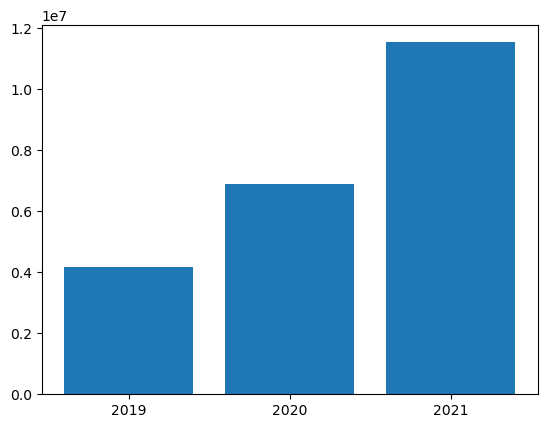

In [19]:
from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

# Display the plot
plt.show()

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 22, Finished, Available, Finished)

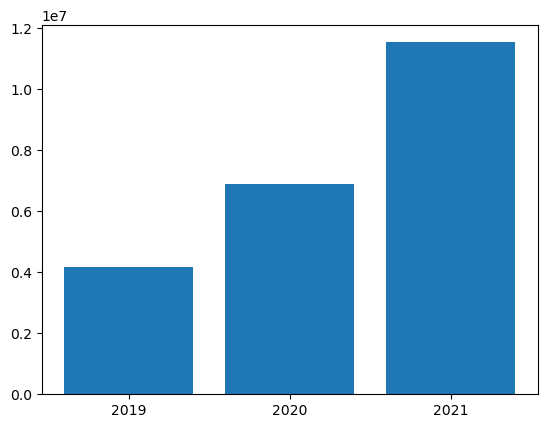

In [20]:
from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

# Display the plot
plt.show()

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 23, Finished, Available, Finished)

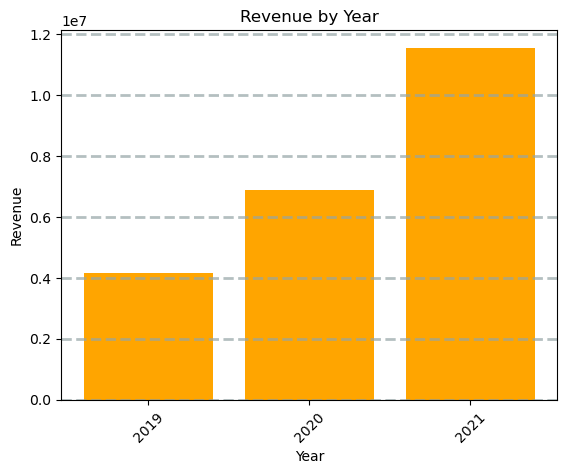

In [21]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 24, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

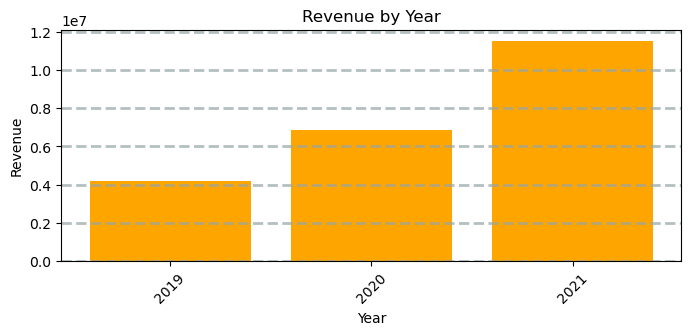

In [22]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 25, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

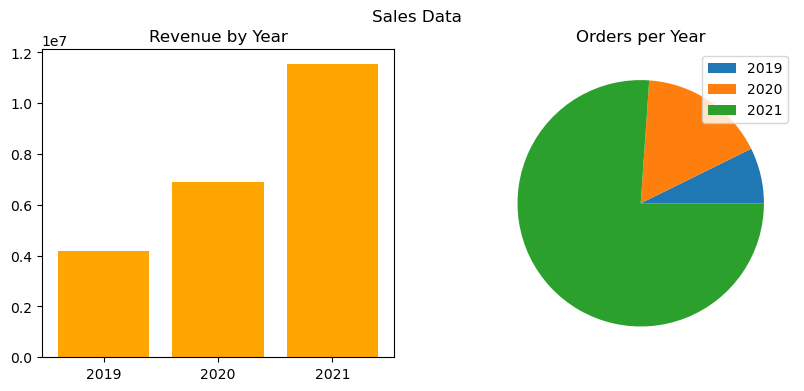

In [23]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of revenue by year on the first axis
ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')

# Create a pie chart of yearly order counts on the second axis
ax[1].pie(df_sales['YearlyCounts'])
ax[1].set_title('Orders per Year')
ax[1].legend(df_sales['OrderYear'])

# Add a title to the Figure
fig.suptitle('Sales Data')

# Show the figure
plt.show()

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 26, Finished, Available, Finished)

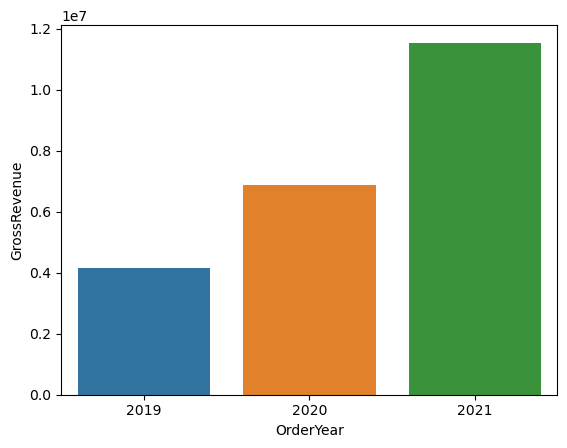

In [24]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 27, Finished, Available, Finished)

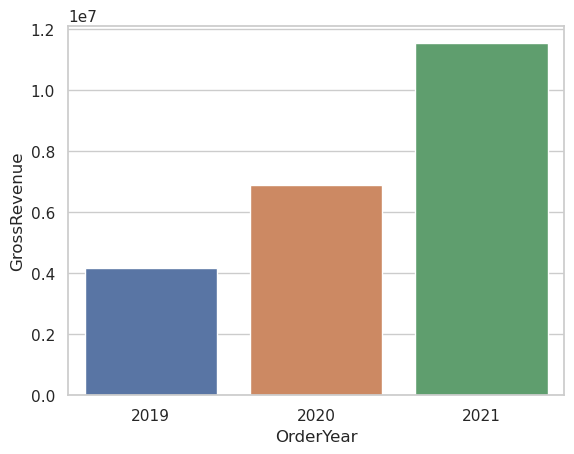

In [25]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()

StatementMeta(, 6afef36d-9451-4d7f-a73c-63e309a3fbd9, 28, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


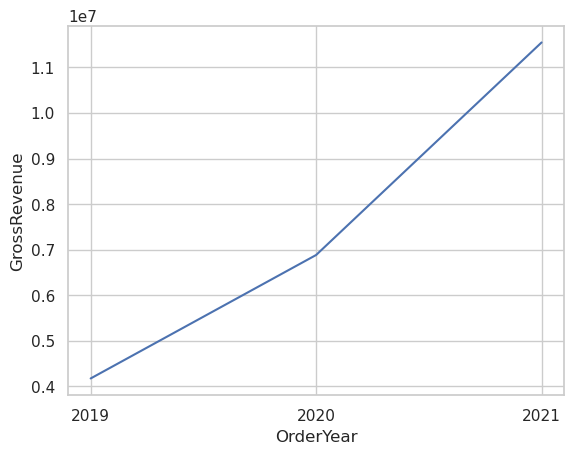

In [26]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a line chart
ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()